[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson3/hometask/SyntheticRubber.ipynb)

In [28]:
##### При работе в Colab
!pip install yfinance

You should consider upgrading via the 'C:\Users\79216\PycharmProjects\python-for-data-analytics\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [29]:
import os
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from tqdm.auto import tqdm

In [30]:
# Для работы с API может потребоваться обходное решение для работы с SSL сертификатом
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании.
* Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании.
* Ваши клиенты предпочитают формульный подход к ценообразованию и вам нужно предложить клиентам формулу цены на синтетический каучук, который может быть альтернативой натуральному каучуку с грейдом SMR 20.
* В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента…

In [31]:
# Из данных есть:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии)
# location - локация клиента
# volumes - закупаемые объемы
# formula - предпочитаемая формула расчета цены - скользящая средняя или среднее значение за месяц

customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'formula':'moving_average'
    },

    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'formula': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'formula': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'formula': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%


In [32]:
# Тикеры
# нефть 'CL=F'
# курс евро к доллару 'EURUSD=X'
# курс евро к рублю 'EURRUB=X'
# курс доллара к рублю 'USDRUB=X'

In [33]:
df_dict = {}
for ticker in tqdm(['CL=F','USDRUB=X', 'EURUSD=X', 'EURRUB=X']):
    df = yf.download(ticker)
    df = df.Close.copy()
    df = df.resample('M').mean()
    df_dict[ticker] = df

  0%|          | 0/4 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
df = yf.download(ticker)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,35.740002,35.779999,35.316002,35.509998,35.509998,0
2003-12-02,35.509998,35.939999,35.375999,35.880001,35.880001,0
2003-12-03,35.889999,36.000000,35.709999,35.980000,35.980000,0
2003-12-04,35.959999,36.029999,35.625000,35.840000,35.840000,0
2003-12-05,35.840000,36.080002,35.617001,36.080002,36.080002,0
...,...,...,...,...,...,...
2022-07-29,60.304699,61.674900,60.304699,60.304699,60.304699,0
2022-08-01,63.561001,63.754002,62.562401,63.701000,63.701000,0
2022-08-02,62.562401,62.562401,61.889900,62.562401,62.562401,0


In [35]:
main_df = pd.concat(df_dict.values(), axis=1)
main_df.columns = ['CRUDE_OIL_USD','USDRUB', 'EURUSD', 'EURRUB']
main_df = main_df.loc['2019-06-30':'2022-06-30'].copy()
main_df['MWP_PRICE_EUR'] = main_df.CRUDE_OIL_USD * 16 * (1/main_df.EURUSD) + 400
main_df['MWP_PRICE_USD'] = main_df.CRUDE_OIL_USD * 16 + 400 * main_df.EURUSD
main_df['MWP_PRICE_EUR_EU'] = main_df['MWP_PRICE_EUR'] + EU_LOGISTIC_COST_EUR
main_df['MWP_PRICE_USD_CN'] = main_df['MWP_PRICE_USD'] + CN_LOGISTIC_COST_USD
main_df['MWP_PRICE_EUR_EU_MA'] = main_df.MWP_PRICE_EUR_EU.rolling(window=3).mean()

In [36]:
main_df

,CRUDE_OIL_USD,USDRUB,EURUSD,EURRUB,MWP_PRICE_EUR,MWP_PRICE_USD,MWP_PRICE_EUR_EU,MWP_PRICE_USD_CN,MWP_PRICE_EUR_EU_MA
Date,,,,,,,,,
2019-06-30,54.706500,64.168690,1.129002,72.458005,1175.290064,1326.904789,1205.290064,1456.904789,NaN
2019-07-31,57.546364,63.176222,1.122682,70.956822,1220.127257,1369.814481,1250.127257,1499.814481,NaN
2019-08-31,54.844091,65.687992,1.113163,73.143709,1188.298999,1322.770735,1218.298999,1452.770735,1224.572106
2019-09-30,56.967000,64.971148,1.101377,71.589861,1227.574949,1352.022793,1257.574949,1482.022793,1242.000402
2019-10-31,54.005653,64.341009,1.104839,71.093322,1182.096026,1306.026169,1212.096026,1436.026169,1229.323324
2019-11-30,57.070000,63.833124,1.105471,70.593953,1226.001103,1355.308273,1256.001103,1485.308273,1241.890693
2019-12-31,59.804762,62.899559,1.110955,69.886841,1261.309490,1401.258241,1291.309490,1531.258241,1253.135540
2020-01-31,57.528572,61.828313,1.111180,68.664805,1228.359873,1364.929260,1258.359873,1494.929260,1268.556822
2020-02-29,50.542105,63.991130,1.091091,69.840279,1141.160840,1245.109950,1171.160840,1375.109950,1240.276734


In [37]:
!pip install requests

You should consider upgrading via the 'C:\Users\79216\PycharmProjects\python-for-data-analytics\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [38]:
import requests

In [39]:
# Котировки натурального каучука доступны на сайте,  https://www.lgm.gov.my
# также у них есть API, пример запроса ниже
#
year = '2022'
month = '05'
url = f"https:///webv2api/api/rubberprice/month={month}&year={year}"
res = requests.get(url)
rj = res.json()
df = pd.json_normalize(rj)
df.head()

,date,grade,masa,rm,us,tone
0,2022-05-31,SMR CV,Noon,1157.50,269.20,Slightly steadier
1,2022-05-31,SMR L,Noon,1147.50,266.90,Slightly steadier
2,2022-05-31,SMR 5,Noon,740.00,172.10,Slightly steadier
3,2022-05-31,SMR GP,Noon,737.00,171.40,Slightly steadier
4,2022-05-31,SMR 10,Noon,730.00,169.80,Slightly steadier


In [61]:
all_dfs = []
for y in ['2020','2021','2022']:
    for m in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={m}&year={y}"
        res = requests.get(url)
        rj = res.json()
        temp_df = pd.json_normalize(rj)
        all_dfs.append(temp_df)

In [62]:
df = pd.concat(all_dfs)

In [63]:
df

,date,grade,masa,rm,us,tone
0,2020-01-31,SMR CV,Noon,767.50,190.70,Quiet
1,2020-01-31,SMR L,Noon,757.50,188.20,Quiet
2,2020-01-31,SMR 5,Noon,562.50,139.75,Quiet
3,2020-01-31,SMR GP,Noon,559.50,139.00,Quiet
4,2020-01-31,SMR 10,Noon,552.50,137.25,Quiet
...,...,...,...,...,...,...
23,2022-08-01,SMR 5,Noon,680.50,155.45,Quiet
24,2022-08-01,SMR GP,Noon,677.50,154.80,Quiet
25,2022-08-01,SMR 10,Noon,670.50,153.20,Quiet
26,2022-08-01,SMR 20,Noon,668.50,152.75,Quiet


In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

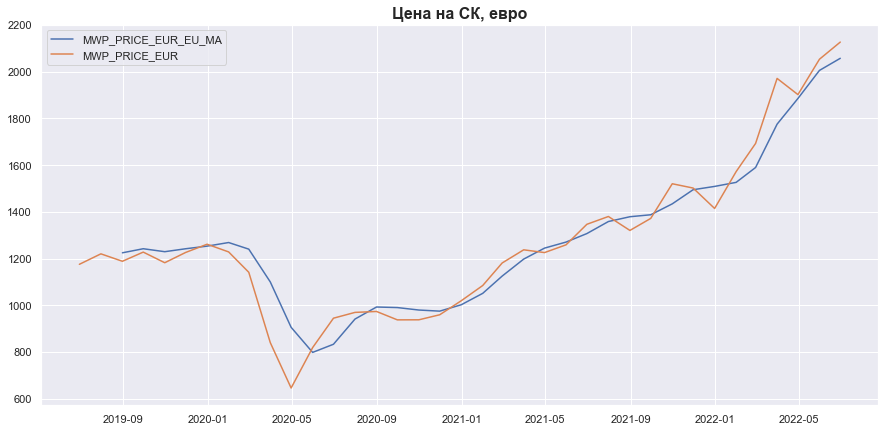

In [47]:
plt.title('Цена на СК, евро', fontsize=16, fontweight='bold')
plt.plot(main_df['MWP_PRICE_EUR_EU_MA'], label='MWP_PRICE_EUR_EU_MA')
plt.plot(main_df['MWP_PRICE_EUR'], label='MWP_PRICE_EUR')
plt.legend()
plt.show()

In [48]:
customers

{'Monty': {'location': 'EU', 'volumes': 200, 'formula': 'moving_average'},
 'Triangle': {'location': 'CN', 'volumes': 30, 'formula': 'monthly'},
 'Stone': {'location': 'EU', 'volumes': 150, 'formula': 'moving_average'},
 'Poly': {'location': 'EU', 'volumes': 70, 'formula': 'monthly'}}

In [49]:
discounts = {100: 0.01, 300: 0.05, 301: 0.1}

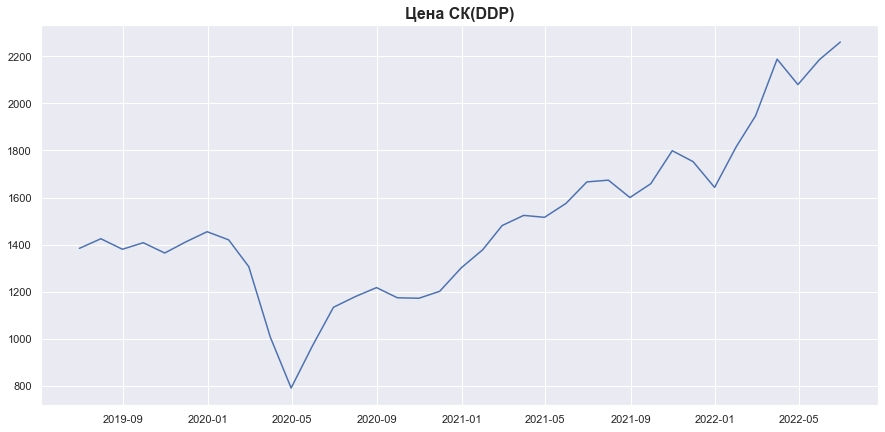

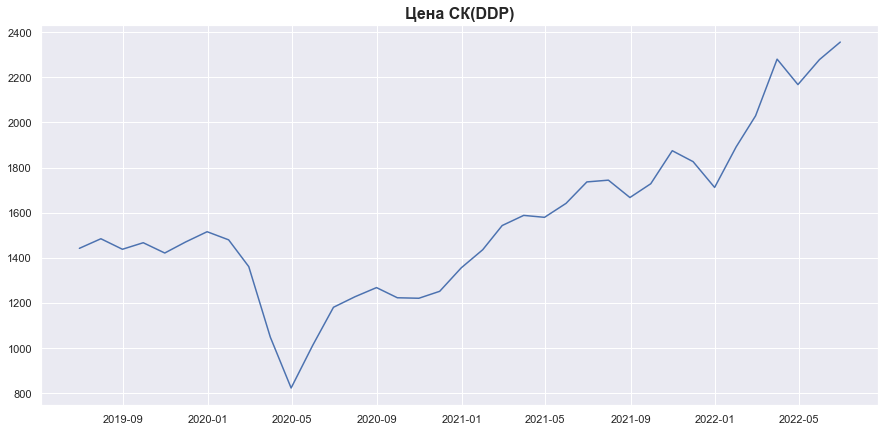

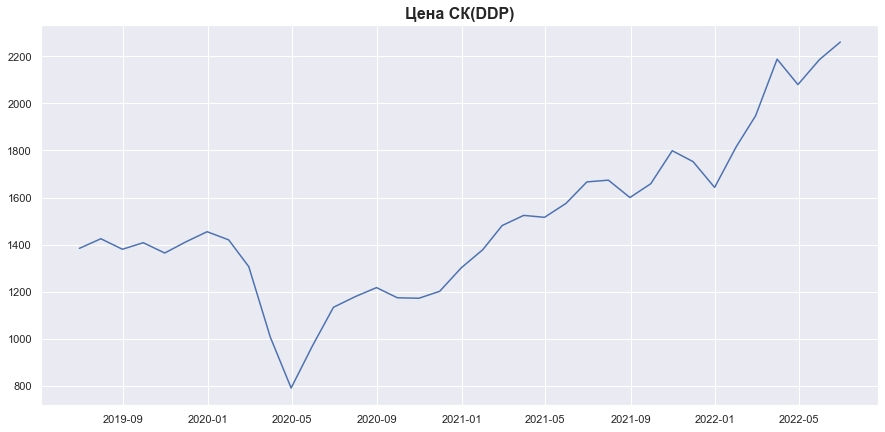

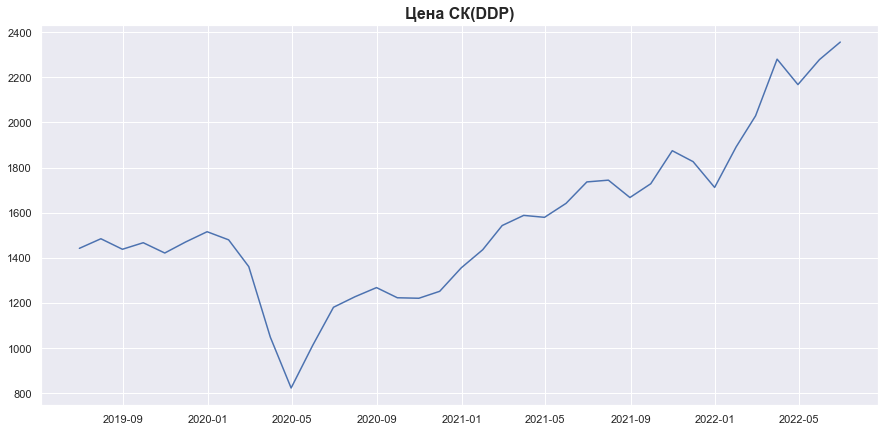

In [51]:
with pd.ExcelWriter('price_proposals.xlsx', engine = 'xlsxwriter') as writer:
    for client, v in customers.items():

        disc = 0.0
        if v.get('location') == "EU":
            fl = 0
            for k_lim, discount_share in discounts.items():
                if v.get('volumes') > k_lim:
                    continue
                else:
                    disc = discount_share
                    fl = 1
                    break
            if fl == 0 :
                disc = discounts.get(max(discounts.keys()))

            if v.get('comment') == 'monthly':
                client_price = main_df['MWP_PRICE_EUR_EU'] * (1-disc)
            elif v.get('comment') == 'moving_average':
                client_price = main_df['MWP_PRICE_EUR_EU_MA'] * (1-disc)

        elif v.get('location') == 'CN':
            fl = 0
            for k_lim, discount_share in discounts.items():
                if v.get('volumes') > k_lim:
                    continue
                else:
                    disc = discount_share
                    fl = 1
                    break
            if fl == 0 :
                disc = discounts.get(max(discounts.keys()))

        client_price = main_df['MWP_PRICE_USD_CN'] * (1-disc)

        # print(client, v, disc)
        client_price.to_excel(writer, sheet_name=client)
        # Добавляем график с ценой
        plot_path = f'{client}_wbp.png'
        plt.title('Цена СК(DDP)', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        # worksheet = writer.sheets[client]
        # worksheet.insert_image('C2',plot_path)

    for k,v in customers.items():
        worksheet = writer.sheets[k]
        worksheet.insert_image('C2',f"{k}_wbp.png")

for k,v in customers.items():
    if os.path.exists(f"{k}_wbp.png"):
        os.remove(f"{k}_wbp.png")

# Задание 2. Продолжение

Клиенты согласились на ваше предложение.
### Что нужно сделать?
Вам нужно написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно.



* В результате должен быть скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

# Задание 3. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

### Что нужно сделать?
* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ
* Помните о PEP8

In [3]:
# import yourpackage

# Задание 4. Поделись пакетом

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

### Что нужно сделать?
* Создайте отдельный пакет, который можно устанавливать с помощью pip
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в свой репозиторий

In [ ]:
# !pip install yourpackage
# import yourpackage